# OPPG 15

In [101]:
import pandas as pd
import statsmodels.graphics.factorplots as smgf
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [102]:
beer_clever = pd.read_csv('BeerDataClever.csv', sep=';')
beer_not_clever = pd.read_csv('BeerDataNotClever.csv', sep=';')

In [103]:
print(beer_clever.head(), beer_not_clever.head())

   Unnamed: 0  Taste Ingredience1 Ingredience2 Ingredience3
0           1      0          Yes          Yes          Yes
1           2      2          Yes          Yes          Yes
2           3      6          Yes          Yes           No
3           4      7          Yes          Yes           No
4           5      9          Yes           No          Yes    Unnamed: 0  Taste Ingredience1 Ingredience2 Ingredience3
0           1      0          Yes          Yes          Yes
1           2      2          Yes          Yes          Yes
2           3      0          Yes          Yes          Yes
3           4      1          Yes          Yes          Yes
4           5      7          Yes           No           No


## Oppg 15a)

In [104]:
beer_clever.head()

,Unnamed: 0,Taste,Ingredience1,Ingredience2,Ingredience3
0,1,0,Yes,Yes,Yes
1,2,2,Yes,Yes,Yes
2,3,6,Yes,Yes,No
3,4,7,Yes,Yes,No
4,5,9,Yes,No,Yes


In [105]:
beer_not_clever.head()

,Unnamed: 0,Taste,Ingredience1,Ingredience2,Ingredience3
0,1,0,Yes,Yes,Yes
1,2,2,Yes,Yes,Yes
2,3,0,Yes,Yes,Yes
3,4,1,Yes,Yes,Yes
4,5,7,Yes,No,No


### Clever can be treated as a complete 3 factor factorial design because they have all combinations of the ingreadians and have at least two of them to verify

## oppg 15b) 

In [122]:
model_3_way_clever = ols('Taste ~ C(Ingredience1, Sum) * C(Ingredience2, Sum) * C(Ingredience3, Sum)', data=beer_clever).fit()
anova_table_3_way_clever = sm.stats.anova_lm(model_3_way_clever)
anova_table_3_way_clever

,df,sum_sq,mean_sq,F,PR(>F)
"C(Ingredience1, Sum)",1.0,0.0625,0.0625,0.047619,0.832723
"C(Ingredience2, Sum)",1.0,14.0625,14.0625,10.714286,0.011301
"C(Ingredience3, Sum)",1.0,10.5625,10.5625,8.047619,0.021919
"C(Ingredience1, Sum):C(Ingredience2, Sum)",1.0,0.5625,0.5625,0.428571,0.531058
"C(Ingredience1, Sum):C(Ingredience3, Sum)",1.0,0.5625,0.5625,0.428571,0.531058
"C(Ingredience2, Sum):C(Ingredience3, Sum)",1.0,68.0625,68.0625,51.857143,0.000092
"C(Ingredience1, Sum):C(Ingredience2, Sum):C(Ingredience3, Sum)",1.0,0.0625,0.0625,0.047619,0.832723
Residual,8.0,10.5000,1.3125,NaN,NaN


In [123]:
model_3_way_not_clever = ols('Taste ~ C(Ingredience1, Sum)*C(Ingredience2, Sum)*C(Ingredience3, Sum)', data=beer_not_clever).fit()
anova_table_3_way_not_clever = sm.stats.anova_lm(model_3_way_not_clever)
anova_table_3_way_not_clever

,df,sum_sq,mean_sq,F,PR(>F)
"C(Ingredience1, Sum)",1.0,60.062500,60.062500,61.340426,0.000005
"C(Ingredience2, Sum)",1.0,14.062500,14.062500,14.361702,0.002578
"C(Ingredience3, Sum)",1.0,22.562500,22.562500,23.042553,0.000433
"C(Ingredience1, Sum):C(Ingredience2, Sum)",1.0,0.083333,0.083333,0.085106,0.775475
"C(Ingredience1, Sum):C(Ingredience3, Sum)",1.0,0.285714,0.285714,0.291793,0.598956
"C(Ingredience2, Sum):C(Ingredience3, Sum)",1.0,2.380952,2.380952,2.431611,0.144882
"C(Ingredience1, Sum):C(Ingredience2, Sum):C(Ingredience3, Sum)",1.0,2.689899,2.689899,2.747131,0.123321
Residual,12.0,11.750000,0.979167,NaN,NaN


### not clever sin model indikerer at det er noe feil med analysen, dermed så går det ikke å kjøre model summary på den

## oppg 15c)

In [124]:
model_3_way_clever_simple = ols('Taste ~ C(Ingredience2, Sum)*C(Ingredience3, Sum)', data=beer_clever).fit()
anova_table_3_way_clever_simple = sm.stats.anova_lm(model_3_way_clever_simple)
print(model_3_way_clever_simple.summary())
anova_table_3_way_clever_simple

                            OLS Regression Results                            
Dep. Variable:                  Taste   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     31.55
Date:                Wed, 19 Aug 2020   Prob (F-statistic):           5.65e-06
Time:                        15:48:01   Log-Likelihood:                -20.233
No. Observations:                  16   AIC:                             48.47
Df Residuals:                      12   BIC:                             51.56
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

C:\Users\eirik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


,df,sum_sq,mean_sq,F,PR(>F)
"C(Ingredience2, Sum)",1.0,14.0625,14.062500,14.361702,0.002578
"C(Ingredience3, Sum)",1.0,10.5625,10.562500,10.787234,0.006527
"C(Ingredience2, Sum):C(Ingredience3, Sum)",1.0,68.0625,68.062500,69.510638,0.000002
Residual,12.0,11.7500,0.979167,NaN,NaN


### Man kan fjerne 'Ingredience1', den har ikke interaction

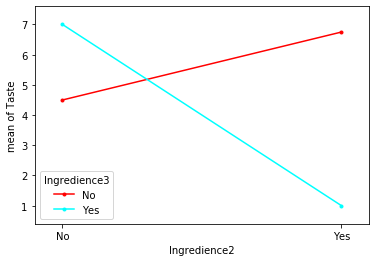

In [59]:
import statsmodels.graphics.factorplots as smgf
plot = smgf.interaction_plot(beer_clever['Ingredience2'], beer_clever['Ingredience3'], beer_clever['Taste'])

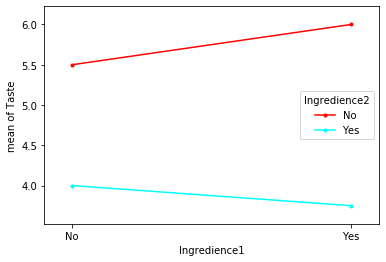

In [66]:
plot2 = smgf.interaction_plot(beer_clever['Ingredience1'], beer_clever['Ingredience2'], beer_clever['Taste'])

### som man kan se på plottene og lese av fra modellen med ingridiense 2 og 3, så tyder det på at den beste smaken kommer av å bare tilsette ingridiens3 uten noen av de andre smakene.

## oppg 15d)

In [125]:
model_not_so_clever_3_way = ols('Taste ~ C(Ingredience1, Sum) + C(Ingredience2, Sum) + C(Ingredience3, Sum)', data=beer_not_clever).fit()
anova_table_3_way_not_clever = sm.stats.anova_lm(model_not_so_clever_3_way)
model_not_so_clever_3_way.summary()

C:\Users\eirik\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Taste   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     32.91
Date:                Wed, 19 Aug 2020   Prob (F-statistic):           4.52e-06
Time:                        15:49:31   Log-Likelihood:                -20.233
No. Observations:                  16   AIC:                             48.47
Df Residuals:                      12   BIC:                             51.56
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      4.8125      0.247     19.454      0.000       4.274       5.351
C(Ingredience1, Sum)[S.No]     1.9375      0.247      7.832      0.000       1.399       2.476
C(Ingredience2, Sum)[S.No]     0.9375      0.247      3.790      0.003       0.399       1.476
C(Ingredience3, Sum)[S.No]     1.1875      0.247      4.800      0.000       0.649       1.726
==============================================================================
Omnibus:                        2.098   Durbin-Watson:                   2.750
Prob(Omnibus):                  0.350   Jarque-Bera (JB):                1.394
Skew:                           0.708   Prob(JB):                        0.498
Kurtosis:                       2.703   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Sidne det ikke går an a lage et estimate for main effect så er dette den mest avanserte modellen man kan lage, og dermed må man bruke alle ingridiensene fordi de bidrar positivt

# OPPG 16

## 16c)

In [6]:
import pandas as pd
import researchpy as rp
barley = pd.read_csv('Barley.csv', sep=';', decimal=',')
summary_cont = rp.summary_cont(barley.groupby(['Variety', 'Soil', 'Fertilizer', 'Site'])['Yield'])
barley.head()

,Yield,Variety,Soil,Fertilizer,Site
0,347.306107,C1,Sand,Fert1,Site1
1,364.311149,C1,Sand,Fert2,Site1
2,337.251517,C1,Clay,Fert1,Site1
3,417.930062,C1,Clay,Fert2,Site1
4,398.014700,C2,Sand,Fert1,Site1


## oppg 16d)

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

In [10]:
model = ols('Yield ~ C(Variety, Sum)*C(Soil, Sum)*C(Fertilizer, Sum)*C(Site, Sum)', data=barley).fit()
anova_table = sm.stats.anova_lm(model)
print(anova_table)

                                                      df        sum_sq  \
C(Variety, Sum)                                      1.0   3246.871692   
C(Soil, Sum)                                         1.0  42070.945610   
C(Fertilizer, Sum)                                   1.0   9846.133275   
C(Site, Sum)                                         1.0   1073.452826   
C(Variety, Sum):C(Soil, Sum)                         1.0  10840.671651   
C(Variety, Sum):C(Fertilizer, Sum)                   1.0   6398.336813   
C(Soil, Sum):C(Fertilizer, Sum)                      1.0  46396.403617   
C(Variety, Sum):C(Site, Sum)                         1.0   1073.218645   
C(Soil, Sum):C(Site, Sum)                            1.0   1404.731447   
C(Fertilizer, Sum):C(Site, Sum)                      1.0    190.800078   
C(Variety, Sum):C(Soil, Sum):C(Fertilizer, Sum)      1.0   3639.330098   
C(Variety, Sum):C(Soil, Sum):C(Site, Sum)            1.0   2670.731441   
C(Variety, Sum):C(Fertilizer, Sum):C(S

## oppg 16e)

In [12]:
model_downsided = ols('Yield ~ C(Variety, Sum)*C(Soil, Sum)*C(Fertilizer, Sum)', data=barley).fit()
anova_table_downsided = sm.stats.anova_lm(model_downsided)
print(anova_table_downsided)

                                                   df        sum_sq  \
C(Variety, Sum)                                   1.0   3246.871692   
C(Soil, Sum)                                      1.0  42070.945610   
C(Fertilizer, Sum)                                1.0   9846.133275   
C(Variety, Sum):C(Soil, Sum)                      1.0  10840.671651   
C(Variety, Sum):C(Fertilizer, Sum)                1.0   6398.336813   
C(Soil, Sum):C(Fertilizer, Sum)                   1.0  46396.403617   
C(Variety, Sum):C(Soil, Sum):C(Fertilizer, Sum)   1.0   3639.330098   
Residual                                         24.0  17178.609635   

                                                      mean_sq          F  \
C(Variety, Sum)                                   3246.871692   4.536160   
C(Soil, Sum)                                     42070.945610  58.776741   
C(Fertilizer, Sum)                                9846.133275  13.755898   
C(Variety, Sum):C(Soil, Sum)                     10840.6

In [43]:
SS_ER = anova_table_downsided['sum_sq'][7]
SS_EF = anova_table['sum_sq'][15]
df_ER = anova_table_downsided['df'][7]
df_EF = anova_table['df'][15]
F0 = ((SS_ER-SS_EF)/(df_ER-df_EF))/(SS_EF/df_EF)
F_test = stats.f.sf(F0, df_ER-df_EF, df_EF)
F_test

0.3265903268053856

#### Kan ikke fokaste H0 og vi bruker dermed den reduserte modellen uten Site

## oppg 16f)

In [55]:
model_downsided = ols('Yield ~ C(Variety, Sum)*C(Soil, Sum)*C(Fertilizer, Sum)-C(Variety, Sum):C(Soil, Sum):C(Fertilizer, Sum)', data=barley).fit()
anova_table_downsided = sm.stats.anova_lm(model_downsided)
print(anova_table_downsided)

                                      df        sum_sq       mean_sq  \
C(Variety, Sum)                      1.0   3246.871692   3246.871692   
C(Soil, Sum)                         1.0  42070.945610  42070.945610   
C(Fertilizer, Sum)                   1.0   9846.133275   9846.133275   
C(Variety, Sum):C(Soil, Sum)         1.0  10840.671651  10840.671651   
C(Variety, Sum):C(Fertilizer, Sum)   1.0   6398.336813   6398.336813   
C(Soil, Sum):C(Fertilizer, Sum)      1.0  46396.403617  46396.403617   
Residual                            25.0  20817.939733    832.717589   

                                            F        PR(>F)  
C(Variety, Sum)                      3.899127  5.945458e-02  
C(Soil, Sum)                        50.522465  1.890488e-07  
C(Fertilizer, Sum)                  11.824097  2.058662e-03  
C(Variety, Sum):C(Soil, Sum)        13.018425  1.345007e-03  
C(Variety, Sum):C(Fertilizer, Sum)   7.683682  1.036913e-02  
C(Soil, Sum):C(Fertilizer, Sum)     55.716853  8.11

#### Yet again, you can remove the interaction between Vareity and fertilizer 

In [60]:
model_more_downsided = ols('Yield ~ C(Variety, Sum)*C(Soil, Sum)*C(Fertilizer, Sum)-C(Variety, Sum):C(Soil, Sum):C(Fertilizer, Sum)-C(Variety, Sum):C(Fertilizer, Sum)', data=barley).fit()
anova_table_more_downsided = sm.stats.anova_lm(model_more_downsided)
print(anova_table_more_downsided)

                                   df        sum_sq       mean_sq          F  \
C(Variety, Sum)                   1.0   3246.871692   3246.871692   3.101771   
C(Soil, Sum)                      1.0  42070.945610  42070.945610  40.190824   
C(Fertilizer, Sum)                1.0   9846.133275   9846.133275   9.406116   
C(Variety, Sum):C(Soil, Sum)      1.0  10840.671651  10840.671651  10.356210   
C(Soil, Sum):C(Fertilizer, Sum)   1.0  46396.403617  46396.403617  44.322980   
Residual                         26.0  27216.276546   1046.779867        NaN   

                                       PR(>F)  
C(Variety, Sum)                  8.996528e-02  
C(Soil, Sum)                     1.031215e-06  
C(Fertilizer, Sum)               4.999631e-03  
C(Variety, Sum):C(Soil, Sum)     3.444495e-03  
C(Soil, Sum):C(Fertilizer, Sum)  4.615372e-07  
Residual                                  NaN  


#### you can not remove anything more because it seems like there is a interaction

## oppg 16g)

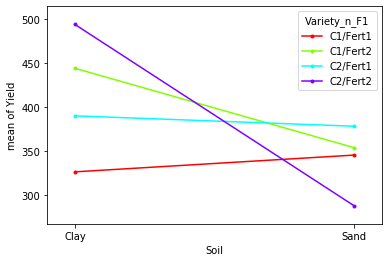

In [82]:
import statsmodels.graphics.factorplots as smgf
barley['Variety_n_F1'] = barley.Variety +'/'+ barley.Fertilizer
plot = smgf.interaction_plot(barley['Soil'], barley['Variety_n_F1'], barley['Yield'])

### Sammenligner med hensyn på F1 sammlet og F2 samlet, så C1/Fert1 og C2/Fert2 hører sammen

### Ser at F1 har en klar interaction, mens F2 møter hverandre ikke i plottet

## oppg 16h)

#### Man ser at hvilken Fertilizer man bruker har noe å si i forhold til plottene. Hvis plottene hadde vært nært like så hadde man kunne si at det har noe å si hvilken fertilizer man bruker, men siden de ikke er så like, så kan man ikke si det. DET HAR NOE Å SI HVILKEN FERTILIZER MAN BRUKER

## oppg 16i)

#### Ville anbefalt Fert 2